# Capstone Project - Exploring Hotels in Toronto, Ont, Canada.
                                Prepared by  SIMON  MAFANY E.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Description](#data)
* [Methodology](#methodology)
* [Clustering](#clustering)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

**XYZ corpation(Hotel & Leisure)** has been operating effectively in 5 large cities in Canada (Montreal, Calgary, Edmonton, Gatineau, and Quebec). With the objective of dominating the hospitality and leisure industry, they have predecided to expand theirbrand by investing on another project in setting up a business line in **Toronto**. 

However, deciding on the exact location to set the structure is a major problem. With everything being equally, XYZ Corporation has some preliminary reservations on whereto set up structures taking into consideration the soundings and environmental friendly factors.

They prefer to set up their structures near or **closely beside touristic endowments,less competitive and averagely densed areas**. XYZ wishes to have atleast 3 options from which a best choice would be made. 
How can we know which location is best to set up structures, considering our reservationsand policies?

## Data Description <a name="data"></a>

To solve this problem, I shall be using datasets sourced from a **wikipedia** page which provides good information and a list of neighbourhoods with associated postal codes in Toronto. This data would captured and scrapped using either BeautifulSoup web scrapping tool or **Pandas DataFrame HTML reader object**.The data is in table format with 3 attributes (Postcode, Borough and Neighbourhour) and 103 distinct records or postal codes. 
*(source: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)*

The Second dataset is a CSV file *(source: https://cocl.us/Geospatial_data)*.
This datasets has 3 attributes **(Postcode, Longitute, Latitute cordinates)** and 103 records. For the purpose of accuracy and cohesiveness, these two datasets would be merged base on their Postcodes. The final dataset would contain 5 attributes and 103 records.

The next strategy would required me to get list of different venues in the Toronto neighbourhood and this would be done using the **Foursquare API** to make calls to endpoints so as to explore the different venues(physicals spots eg. hotels, Restaurans, Touristic sites, ...) in each neighbourhood. Using the Foursquare geolocation data, with the first data, i shall be exporing ane analyzing which solution best meets the need of the problem considering the policies and preferences of XYZ Corporation

### Extracting And Preparing the Dataset



In [784]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [776]:
#Reading data from the data source using 'pandas.read_html'
try:
    data = pd.read_html(r"""https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M""")
    print('Table Found')
except Exception as e:
    print(e,':  NO TABLES FOUND ON WEBSITE')

Table Found


In [777]:
#Preparing the data
data = data[0]
columns = ["Postcode","Borough","Neighbourhood"]
data.columns = columns

data.drop(0, axis=0, inplace=True)

In [778]:
#slicing out assigned Borough records
Assigned_Borough =  data[data['Borough'] != 'Not assigned']

In [779]:
#Aggregating Neighbourhoods per Postcode
Data = Assigned_Borough.groupby(['Postcode', 'Borough'], as_index=False).agg('sum')
Data = Data.sample(n=len(Data['Postcode']), random_state=500)

In [780]:
#Assigning Borough value to Not assigned Neighbourhood values
Data['Neighbourhood'] = Data['Neighbourhood'].replace('Not assigned', Data['Borough'])

In [781]:
#Loading Cordinates from CSV file
url = r"https://cocl.us/Geospatial_data"
Cordinates = pd.read_csv(url)

In [782]:
#Merging these two dataframes (Data & Cordinates)
JoinedData =  pd.concat([Data, Cordinates],axis=1)

#Feature Selection
JoinedData = JoinedData[['Postcode', 'Borough','Latitude', 'Longitude', 'Neighbourhood']]
JoinedData.head(5)

,Postcode,Borough,Latitude,Longitude,Neighbourhood
0,M1B,Scarborough,43.806686,-79.194353,RougeMalvern
1,M1C,Scarborough,43.784535,-79.160497,Highland CreekRouge HillPort Union
2,M1E,Scarborough,43.763573,-79.188711,GuildwoodMorningsideWest Hill
3,M1G,Scarborough,43.770992,-79.216917,Woburn
4,M1H,Scarborough,43.773136,-79.239476,Cedarbrae


In [677]:
import requests

CLIENT_ID = 'LUFUYXO1AK5NGDSIXN5ZJU2OEJHSC2TIV45I1O1BDW5IKBNI' 
CLIENT_SECRET = 'CJEWWHI1VNV5KL2XKJU0GVNH0RASF0L3XFL1RPPJ5SLLW5PX' 
CORDINATES = "43.70011,-79.4163"
VERSION = '20190630'
search_query = 'hotels'
LIMIT = 30
radius =  5000



Hotels_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={}&v={}&query={}&radius={}&limit={}'\
.format(CLIENT_ID, CLIENT_SECRET, CORDINATES, VERSION, search_query, radius, LIMIT)
print('Hotels=', Hotels_url)


print('-----------------------------------')

Venues_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={}&v={}&query={}&radius={}&limit={}'\
.format(CLIENT_ID, CLIENT_SECRET, CORDINATES, VERSION, 'venues', radius, LIMIT)
print('venues=', Venues_url)

Hotels= https://api.foursquare.com/v2/venues/explore?client_id=LUFUYXO1AK5NGDSIXN5ZJU2OEJHSC2TIV45I1O1BDW5IKBNI&client_secret=CJEWWHI1VNV5KL2XKJU0GVNH0RASF0L3XFL1RPPJ5SLLW5PX&ll=43.70011,-79.4163&v=20190630&query=hotels&radius=5000&limit=30
-----------------------------------
venues= https://api.foursquare.com/v2/venues/explore?client_id=LUFUYXO1AK5NGDSIXN5ZJU2OEJHSC2TIV45I1O1BDW5IKBNI&client_secret=CJEWWHI1VNV5KL2XKJU0GVNH0RASF0L3XFL1RPPJ5SLLW5PX&ll=43.70011,-79.4163&v=20190630&query=venues&radius=5000&limit=30


In [788]:
hotels = requests.get(Hotels_url).json()
#results = o(r"C:\Users\Simon_Mafany\Documents\MyPackages\IBM_db\from_API.csv")
#type(results
Venues = requests.get(Venues_url).json()

In [789]:
hotels['response']['groups'][0]['items'][0]['venue'].keys()
data = hotels['response']['groups'][0]['items'][0]['venue']

In [790]:
#Getting API data.
lat = []
lng = []
Distance = []
Postcodes = []
Category = []
Names = []
for item in newdic:
    lat.append(item['location']['lat'])
    lng.append(item['location']['lng'])
    Distance.append(item['location']['distance'])
    Category.append(item['categories'][0]['name'])
    Names.append(item['name'])

In [791]:
Data = pd.DataFrame([Category, lat, lng, Distance, Names]).transpose()  
Data.columns=['Category', 'Latitude', 'Logitude', 'Distance', 'Names']

In [792]:
nps = pd.Series(list(np.arange(6.67, 10.0, 0.69)))
Ratings = nps.sample(n=30, random_state=100, replace=True) 
#nps
Data['Ratings'] = Ratings.values.astype(float)

In [793]:
Data.head(10)

,Category,Latitude,Logitude,Distance,Names,Ratings
0,Hotel,43.6718,-79.3895,3821,Four Seasons Hotel Toronto,6.67
1,Hotel,43.6708,-79.3933,3756,The Hazelton Hotel,6.67
2,Hotel,43.6935,-79.3966,1749,Toronto Suites,8.74
3,Hotel,43.6688,-79.3908,4044,Windsor Arms Hotel,6.67
4,Hotel,43.6688,-79.3854,4281,The Anndore House,8.05
5,Hotel,43.7089,-79.3909,2266,Best Western Roehampton Hotel & Suites,9.43
6,Hotel,43.6625,-79.3827,4986,Courtyard Toronto Downtown,8.05
7,Hotel,43.6691,-79.3826,4395,Town Inn Suites,8.05
8,Hotel,43.6701,-79.376,4657,Isabella Hotel,8.05
9,Hotel,43.7259,-79.4592,4487,Holiday Inn Toronto-Yorkdale,8.05


## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of **Toronto** that have low competition(hotel an leisure line of business), particularly those with low number of Hotels, nearness to **Touristic Avenues**. We will limit our analysis to area **not more than 6km** around city center.

We shall be using pandas, scipy, numpy, matplotlib, seaborn, and folium to person exploratory data analysis(descriptive statistics) to discover patterns in the data and equally perform some basic feature engineering and feature selection to prepare data for machine learning.

We shall be using the **Foursquare geolocation** functionalities to get location data to be used through out the project. We shall also use the **Foursquare API** to get data of the neighbours, tips and also venues which are associated with varius cordinates and postcodes. These API calls would practically be both premium and regular.

With the data being set, We shall used various machine learing algorithms to discover patterns in the data. Start by assessing  correlation in features, visualizing the correlations, from which decisions would be made on what best machine learning technique to use.

Algorithms include supervised ML (Random forest and KNN) to predict the category (best location) which the new Project would likely be based on the ground rules(policies an preference). To better understand this prediction, we would equally use unsupervised machine learning algorithm(K-mean cluster) to cluster these locations(neighbours) from which we would discover patterns and gain prediction on best location to set the structure with all requirements and constraints(needs, policies, preference) repected.

We then would test the accuracy of out algorithms for better performance.

**EXPORATORY DATA ANALYSIS**

In [786]:
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sbn

#Data Visualization Paramters
from matplotlib import rcParams

%matplotlib inline
rcParams["figure.figsize"] =  10,6  #or plt.figure(figsize=(10,7))
sbn.set_style("darkgrid")

Text(0,0.5,'HOTELS')

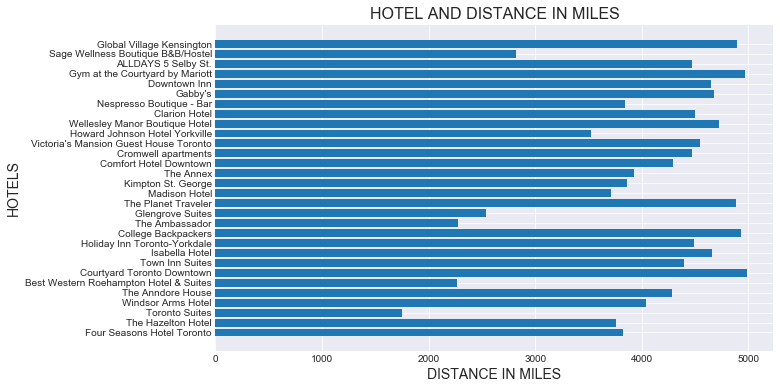

In [794]:
plt. barh(Data.Names,Data.Distance)

plt.title("HOTEL AND DISTANCE IN MILES", fontsize = 16)
plt.xlabel('DISTANCE IN MILES', fontsize = 14)
plt.ylabel("HOTELS", fontsize = 14)

In [686]:
level1 = Data['Distance']<3000
level2 = (Data['Distance']>3000) & (Data['Distance']<4000)
level3 = Data['Distance']>4000

Closer = Data[level1]
Closer['Dist_Remark'] = 'Near'
Closer['Dist_Point'] = 1

Far = Data[level2]
Far['Dist_Remark'] = 'Far'
Far['Dist_Point'] = 0

Furthest = Data[level3]
Furthest['Dist_Remark'] = 'Furthest'
Furthest['Dist_Point'] = -1

NewData = Closer.append([Far, Furthest])
NewData.sample(n=len(NewData), random_state=100)
NewData.tail(4)



,Category,Latitude,Logitude,Distance,Names,Ratings,Dist_Remark,Dist_Point
25,Bed & Breakfast,43.667,-79.3811,4650,Downtown Inn,8.74,Furthest,-1
26,Gym / Fitness Center,43.6624,-79.3832,4972,Gym at the Courtyard by Mariott,9.43,Furthest,-1
27,Hostel,43.6711,-79.3779,4469,ALLDAYS 5 Selby St.,9.43,Furthest,-1
29,Hostel,43.6572,-79.4032,4893,Global Village Kensington,8.74,Furthest,-1


Dist_Remark
Far          7
Furthest    18
Near         5
Name: Distance, dtype: int64


Text(0,0.5,'DISTANCE IN MILES')

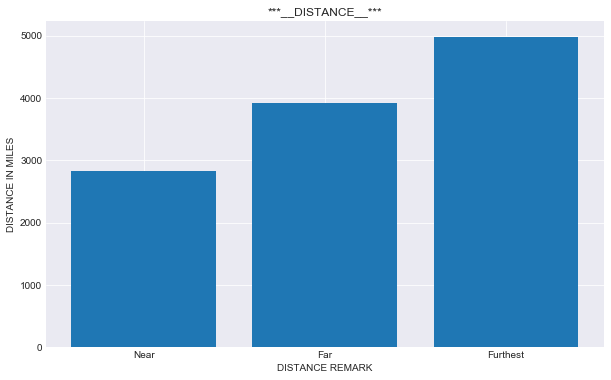

In [795]:
print(NewData.groupby('Dist_Remark')['Distance'].count())

plt.bar(NewData.Dist_Remark, NewData.Distance)
plt.title('***__DISTANCE__***')
plt.xlabel('DISTANCE REMARK')
plt.ylabel('DISTANCE IN MILES')

Text(0,0.5,'Hotels')

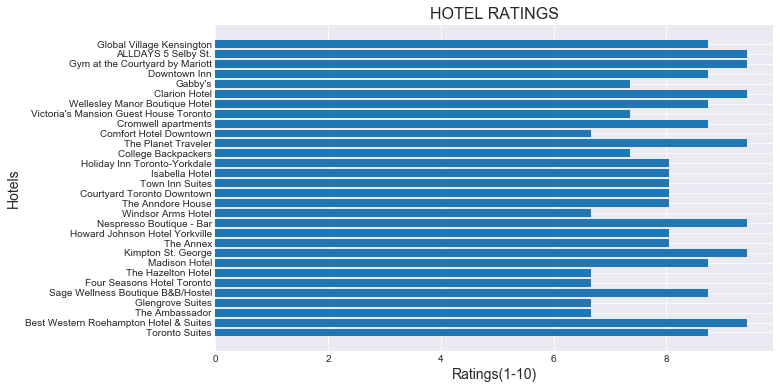

In [796]:
#RATINGS & DISTANCE
#print(NewData)
plt. barh(NewData.Names,NewData.Ratings)
plt.title("HOTEL RATINGS", fontsize = 16)
plt.xlabel('Ratings(1-10)', fontsize = 14)
plt.ylabel("Hotels", fontsize = 14)

Text(0.5,1,'Hotels with given rating(Sorted)')

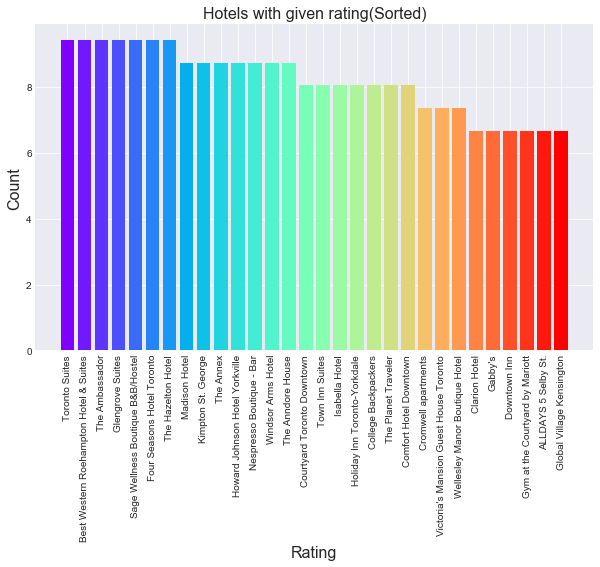

In [797]:
import matplotlib.cm as cm

plt.bar(NewData.Names, sorted(NewData.Ratings,reverse=True ), color = cm.rainbow(np.linspace(0, 1, len(Data['Ratings'].index))))
plt.xticks(rotation = 90)
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Hotels with given rating(Sorted)", fontsize = 16)

In [690]:
#Counting Rating values
NewData['Ratings'].value_counts()#.count()

8.05    7
9.43    7
8.74    7
6.67    6
7.36    3
Name: Ratings, dtype: int64

In [691]:
#STANDARDIZING/SCALING VALUES FOR ML ALG
from sklearn import preprocessing as pp

NewData_Sliced = NewData[['Distance','Ratings']]
NewData_Sliced_Scaled = pp.scale(NewData_Sliced)
NewData_Sliced_Scaled

array([[-2.62071748,  0.56195149],
       [-2.02710051,  1.26439085],
       [-2.01561856, -1.54536659],
       [-1.71708779, -1.54536659],
       [-1.38755574,  0.56195149],
       [-0.24165684, -1.54536659],
       [-0.31628953, -1.54536659],
       [-0.36795832,  0.56195149],
       [-0.20032181,  1.26439085],
       [-0.11879994, -0.14048787],
       [-0.58611542, -0.14048787],
       [-0.22213752,  1.26439085],
       [ 0.01439071, -1.54536659],
       [ 0.286513  , -0.14048787],
       [ 1.09599068, -0.14048787],
       [ 0.41740726, -0.14048787],
       [ 0.71823443, -0.14048787],
       [ 0.52304123, -0.14048787],
       [ 1.03283994, -0.84292723],
       [ 0.98002295,  1.26439085],
       [ 0.29914315, -1.54536659],
       [ 0.50352191,  0.56195149],
       [ 0.59308114, -0.84292723],
       [ 0.79975629,  0.56195149],
       [ 0.53452318,  1.26439085],
       [ 0.74119833, -0.84292723],
       [ 0.71019706,  0.56195149],
       [ 1.07991595,  1.26439085],
       [ 0.50237371,

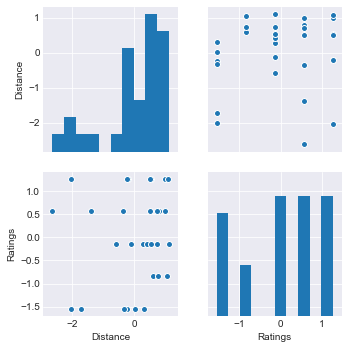

In [798]:
Scaled= pd.DataFrame(NewData_Sliced_Scaled, columns=['Distance','Ratings'])
Scaled.corr()
sbn.pairplot(Scaled)

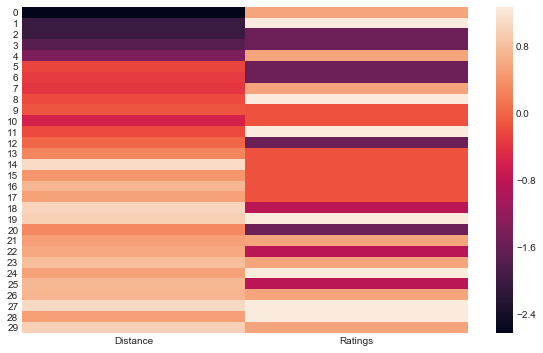

In [799]:
#Correlation Analysis. DOES THE DISTANCE FROM CENTRAL LOCATION INFLUENCE THE RATINGS
sbn.heatmap(Scaled)

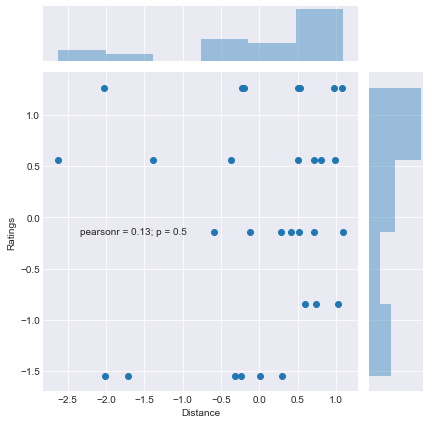

In [800]:
sbn.jointplot(y=Scaled.Ratings, x=Scaled.Distance, data=Scaled)

## CLUSTERING <a name="clustering"></a>

Now we have explored the different Hotels in Toronto with the 
North East ('lat': 43.74511004500005, 'lng': -79.35417254728401) and 
 South West('lat': 43.65510995499996, 'lng': -79.478427452716) 
 
 
 __Let's Cluster this areas using K-Mean clustering Alg__

In [643]:
from sklearn.cluster import KMeans
K = 3
KM_Alg = KMeans(n_clusters=K, random_state=0)
KM_Alg.fit(Scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [644]:
#Lets see the centers
KM_Alg.cluster_centers_
centroid = [np.mean(avg) for avg in KM_Alg.cluster_centers_]
centroid

[0.7138729293049793, -1.0470519437011114, -0.18695303598923166]

In [645]:
#Lets see the predicted labels
Lab_Preds = KM_Alg.labels_

array([1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0])

In [720]:
NewData["Cluster"] = Lab_Preds 
NewData.head()



,Category,Latitude,Logitude,Distance,Names,Ratings,Dist_Remark,Dist_Point,Cluster,Coordinates
2,Hotel,43.6935,-79.3966,1749,Toronto Suites,8.74,Near,1,1,"2 43.69352383954384,-79.39656906682094\n5..."
5,Hotel,43.7089,-79.3909,2266,Best Western Roehampton Hotel & Suites,9.43,Near,1,1,"2 43.69352383954384,-79.39656906682094\n5..."
11,Hotel,43.7104,-79.3919,2276,The Ambassador,6.67,Near,1,1,"2 43.69352383954384,-79.39656906682094\n5..."
12,Hotel,43.7199,-79.4008,2536,Glengrove Suites,6.67,Near,1,1,"2 43.69352383954384,-79.39656906682094\n5..."
28,Hostel,43.6954,-79.4508,2823,Sage Wellness Boutique B&B/Hostel,8.74,Near,1,1,"2 43.69352383954384,-79.39656906682094\n5..."


Lets now assess the coordinates

In [730]:

Cordinates = NewData['Latitude'].astype(str) + ","+ NewData['Logitude'].astype(str)
NewData["Coordinates"] = Cordinates
NewData.head()

,Category,Latitude,Logitude,Distance,Names,Ratings,Dist_Remark,Dist_Point,Cluster,Coordinates
2,Hotel,43.6935,-79.3966,1749,Toronto Suites,8.74,Near,1,1,"43.69352383954384,-79.39656906682094"
5,Hotel,43.7089,-79.3909,2266,Best Western Roehampton Hotel & Suites,9.43,Near,1,1,"43.7088783,-79.3908798"
11,Hotel,43.7104,-79.3919,2276,The Ambassador,6.67,Near,1,1,"43.710417755332664,-79.39186039919568"
12,Hotel,43.7199,-79.4008,2536,Glengrove Suites,6.67,Near,1,1,"43.71994664574377,-79.40079419830145"
28,Hostel,43.6954,-79.4508,2823,Sage Wellness Boutique B&B/Hostel,8.74,Near,1,1,"43.69539098604696,-79.45077496310095"


Text(0.5,1,'Graph showing Ratings and counts.')

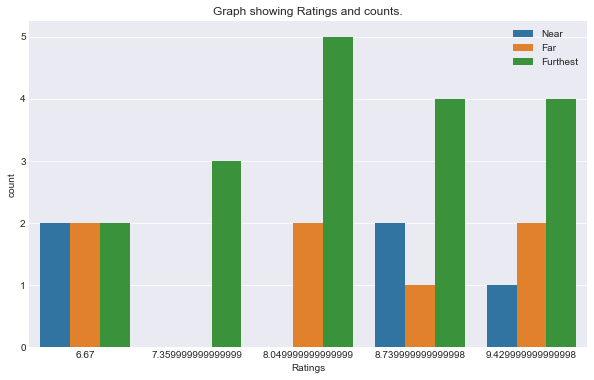

In [864]:
#There ara 3 Clusters (0,1,2)
sbn.countplot(x='Ratings', hue='Dist_Remark', data=NewData)
plt.legend()
plt.title("Graph showing Ratings and counts.")

In [809]:
#comparing Dist_Remark with Cluster
NewData[['Dist_Point', 'Cluster', 'Dist_Remark', 'Ratings']].sort_values('Ratings', ascending=False).head()

,Dist_Point,Cluster,Dist_Remark,Ratings
23,0,0,Far,9.43
27,-1,0,Furthest,9.43
26,-1,0,Furthest,9.43
22,-1,0,Furthest,9.43
15,0,0,Far,9.43


Text(0.5,1,'Clustered')

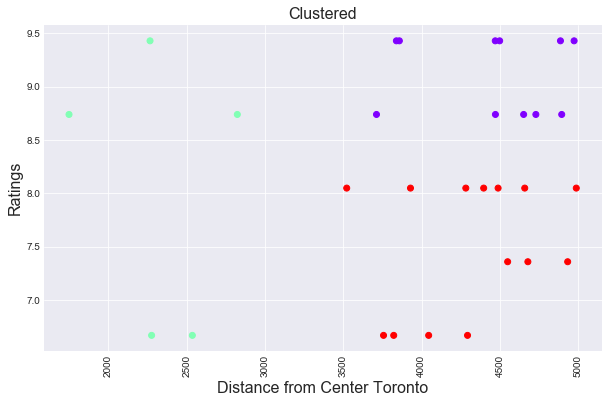

In [803]:
plt.scatter(NewData['Distance'], NewData['Ratings'], c=NewData.Cluster.values, cmap='rainbow')
plt.xticks(rotation = 90)
plt.xlabel("Distance from Center Toronto", fontsize = 16)
plt.ylabel("Ratings", fontsize = 16)
plt.title("Clustered", fontsize = 16)

Text(0,0.5,'Ratings')

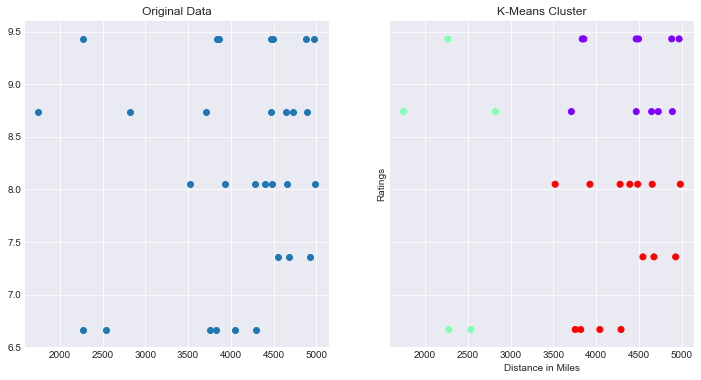

In [868]:
#Comparing the origal data with clusterd data
fig, ( ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(12,6))

ax1.set_title('Original Data')
ax1.scatter(NewData['Distance'], NewData['Ratings'])

ax2.set_title('K-Means Cluster')
ax2.scatter(NewData['Distance'], NewData['Ratings'], c=NewData.Cluster.values, cmap='rainbow')

plt.xlabel('Distance in Miles')
plt.ylabel("Ratings")

In [870]:
#Finding the best location to set up the business
cond = NewData['Dist_Remark']!='Near' 
D = NewData[['Coordinates', 'Cluster', 'Dist_Remark', 'Ratings']]

D2 = D[cond]
cond2 =  D2['Ratings'] > 8.0

Coords = D2[cond2]['Coordinates'].values

lat = []
lng = []
for coord in Coords:
    lat.append(float(coord.split(',')[0]))
    lng.append(float(coord.split(',')[1]))
    
print("Recommended Geolocation to Set up the business is: LAT[{}], LONG[{}] ".format(np.mean(lat),np.mean(lng)))
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("Recommended Geolocation Range of: (START={},{})==> (STOP={},{}) ".format(np.min(lat),np.max(lng), np.min(lat),np.max(lng) ))

Recommended Geolocation to Set up the business is: LAT[43.66991695449217], LONG[-79.39326186185829] 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Recommended Geolocation Range of: (START=43.65717634225227,-79.37598323689265)==> (STOP=43.65717634225227,-79.37598323689265) 


This concludes our analysis.

## Results and Discussion <a name="results"></a>

Our analysis shows that Hotels in Toronto, Ont, Canada  from The South West(lat': 43.65510995499996, 'lng': -79.478427452716) to Nouth East ('lat': 43.74511004500005, 'lng': -79.35417254728401) we could get 30 hotels with each having a specific distance (in miles) from the Central Zone. Equally we discovered that these hotels were rated by clients based on the **Distance from Central a City**

We discovered that hotels could be clustered in 3 groups() with a characteristics including (distance from central town, higher ratings and density.)

Hotels with greater distance from the central town  have higher ratings and higher density ratio.  

As a result, hotels with **less than 3000Miles** away from the central Town tend to be rated low. Whereas, hotels far away from the central town are rated higher (**more than 3500Miles away**).   
Again, low rated hotels are less densed, with a distance of more than 3500Miles but les than 4500Miles, we found the highest number of hotels situated at these very locations. Whereas, at above 4500Miles, hotels are equally densely distributed.

To this effect, we shall encourage XYZ Corporation to invest her resources and set up the new line of business in a location distant from the central town. We recommend that this location should be between 4000 - 5000 Miles away from the central town.

Ranges between: 

*LAT*=**43.65717634225227**, *LONG*=**-79.37598323689265**)  and  *LAT*=**43.65717634225227**,*LONG*=**-79.37598323689265**

Recommended Coordinates:
**[43.66991695449217, -79.39326186185829]**


## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify best location where XYZ Corporatioin would set up a line of business(Hotel & Leisure) in Toronto, Ontaria, Canada. We started by understanding the background and business need of the organisation.
Next, we got into data acquisition and understand where we did some basic cleansing/preparation. We use the Foursquare API to get location data wich we sould used to apply methodology. 

Next, we carried out some exploration data analysis (descriptive statistivs), from where we went ahead to scale/and standardized our data from machine learning alg. We used the K-Cluster unsupervise clustering alg, which we could discover some patterns in the data.
.

Final decision on optimal location to set up the hotel was discovered taking into account density, and nearness to central Town of Toronto.